# Introduction

In this notebook i have used self created** CNN** Model and pretrained model **VGG16 **for classifying the Dog vs Cat datasets.
First, i used only CNN model with augmentation but this time i didnot get good accuracy and thats why i use pretrained model VGG16 for classifying the dog vs cat dataset.

# Import required libraries:

In [1]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
for dirname, _, filenames in os.walk('zipfiles_catdog'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

zipfiles_catdog\sampleSubmission.csv
zipfiles_catdog\test1.zip
zipfiles_catdog\train.zip
zipfiles_catdog\test1\1.jpg
zipfiles_catdog\test1\10.jpg
zipfiles_catdog\test1\100.jpg
zipfiles_catdog\test1\1000.jpg
zipfiles_catdog\test1\10000.jpg
zipfiles_catdog\test1\10001.jpg
zipfiles_catdog\test1\10002.jpg
zipfiles_catdog\test1\10003.jpg
zipfiles_catdog\test1\10004.jpg
zipfiles_catdog\test1\10005.jpg
zipfiles_catdog\test1\10006.jpg
zipfiles_catdog\test1\10007.jpg
zipfiles_catdog\test1\10008.jpg
zipfiles_catdog\test1\10009.jpg
zipfiles_catdog\test1\1001.jpg
zipfiles_catdog\test1\10010.jpg
zipfiles_catdog\test1\10011.jpg
zipfiles_catdog\test1\10012.jpg
zipfiles_catdog\test1\10013.jpg
zipfiles_catdog\test1\10014.jpg
zipfiles_catdog\test1\10015.jpg
zipfiles_catdog\test1\10016.jpg
zipfiles_catdog\test1\10017.jpg
zipfiles_catdog\test1\10018.jpg
zipfiles_catdog\test1\10019.jpg
zipfiles_catdog\test1\1002.jpg
zipfiles_catdog\test1\10020.jpg
zipfiles_catdog\test1\10021.jpg
zipfiles_catdog\test1\10022

# Data Collecting and Precossing

In [2]:
print(os.listdir("zipfiles_catdog"))

['sampleSubmission.csv', 'test1', 'test1.zip', 'train', 'train.zip']


In [3]:
#! unzip  dogs-vs-cats/train.zip
#! unzip  dogs-vs-cats/test1.zip
import glob
import zipfile
files = glob.glob('zipfiles_catdog/*.zip')
files

['zipfiles_catdog\\test1.zip', 'zipfiles_catdog\\train.zip']

In [4]:
for zipfiles_catdog in files:
    print('Unzipping:',zipfiles_catdog)

    with zipfile.ZipFile(zipfiles_catdog, 'r') as zip_ref:
        zip_ref.extractall('dogs_vs_cats')

Unzipping: zipfiles_catdog\test1.zip
Unzipping: zipfiles_catdog\train.zip


# Imgae into pandas Dataframe

In [5]:
import os
filenames= os.listdir("dogs_vs_cats/train/")

categories=[]

for filename in filenames:
    
    category=filename.split(".")[0]
    if category=="dog":
        categories.append(1)
    else:   
       categories.append(0)
        
        
df=pd.DataFrame({'filename':filenames,
                  'category':categories
                })    

In [6]:
df.head()

,filename,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.1000.jpg,0


In [7]:
df.shape

(25000, 2)

In [8]:
df['category'].value_counts()

0    12500
1    12500
Name: category, dtype: int64

<AxesSubplot:>

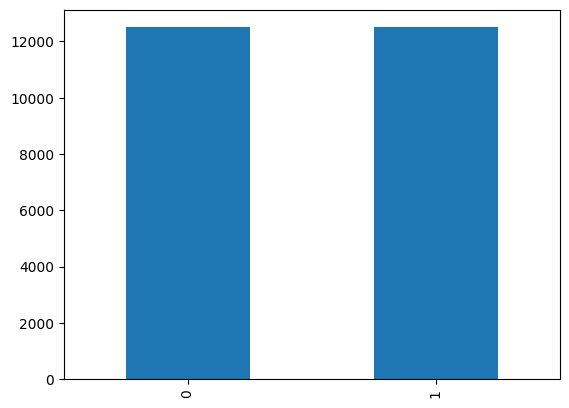

In [9]:
df['category'].value_counts().plot(kind='bar')

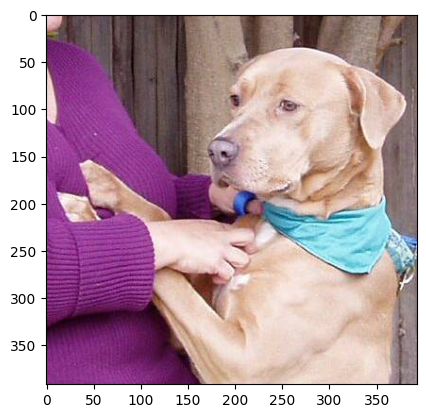

In [10]:
import tensorflow as tf
import keras
random_Img=random.choice(filenames)
image = tf.keras.utils.load_img("dogs_vs_cats/train/"+random_Img)
plt.imshow(image)

# Using Convolution Neural Network

This self made convulotion neural network . First i trained this model with train data set and the validate .Observe the accuracy

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model1 = Sequential()

model1.add(Conv2D(128, (3, 3), activation='relu', input_shape=(128,128,3)))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Flatten())
model1.add(Dense(512, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))
model1.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Preparing data for model1

In [12]:
df['category']=df["category"].replace({0:'cat',1:'dog'})

# Split data in train and validation

In [13]:
train_df,validate_df=train_test_split(df,test_size=.20,random_state=4)
train_df=train_df.reset_index(drop=True)
validate_df=validate_df.reset_index(drop=True)

In [14]:
total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=16

In [15]:
total_validate

5000

# Augmentation and prepare images for our model1

1. What do you mean by data augmentation?
* Image result for augmentation in dl
Data augmentation in data analysis are techniques used to increase the amount of data by adding slightly modified copies of already existing data or newly created synthetic data from existing data. It acts as a regularizer and helps reduce overfitting when training a machine learning model.


2. How basic dataset augmentation works
* Flipping (both vertically and horizontally)
* Rotating.
* Zooming and scaling.
* Cropping.
* Translating (moving along the x or y axis)
* Adding Gaussian noise (distortion of high frequency features)


In [16]:
train_datagen=ImageDataGenerator(
    rotation_range=30,
    rescale=1./255,
    shear_range=0.4,
    zoom_range=0.4,
    horizontal_flip=True,
    width_shift_range=0.4,
    height_shift_range=0.4
)

train_generator=train_datagen.flow_from_dataframe(
    
    train_df,
    "dogs_vs_cats/train/",
    x_col='filename',
    y_col='category',
    target_size=(128,128),
    class_mode='categorical',
    batch_size=batch_size
    
)

Found 20000 validated image filenames belonging to 2 classes.


* ****No need not apply augmentation in validation datasets

In [17]:
validate_datagen=ImageDataGenerator(
    rescale=1./255
)

validate_generator=validate_datagen.flow_from_dataframe(
    validate_df,
    "dogs_vs_cats/train/",
    x_col='filename',
    y_col='category',
    target_size=(128,128),
    class_mode='categorical',
    batch_size=batch_size
    
)

Found 5000 validated image filenames belonging to 2 classes.


# Callbacks:

* What are callbacks in ML?
* A callback is a set of functions to be applied at given stages of the training procedure. You can use callbacks to get a view on internal states and statistics of the model during training

In [18]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [19]:

earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]

# Train and lets see the accuracy rate our model1

In [ ]:
history1=model1.fit_generator(
    train_generator,
    steps_per_epoch=total_train//batch_size, 
    epochs=10, 
    verbose=1,
    callbacks=callbacks, 
    validation_data=validate_generator,
    validation_steps=total_validate//batch_size,
    

    
)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8232\3772244969.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history1=model1.fit_generator(


Epoch 1/10
 129/1250 [==>...........................] - ETA: 19:05 - loss: 1.0750 - accuracy: 0.5286

It is observed that the train and validation accuracy not satisfying.



# Let's try pretrained model:

# Importing libraries for pretrained model

In [ ]:
from tensorflow.keras.applications import VGG16
from keras.models import Model
from keras.layers import Dense,Dropout
from keras.backend import pool2d
from keras.layers.pooling import GlobalAveragePooling2D

# Pretrained model vGG16

* What is a pre-trained model?
* 
A pre-trained model is a saved network that was previously trained on a large dataset, typically on a large-scale image-classification task. You either use the pretrained model as is or use transfer learning to customize this model to a given task.

In [ ]:
base_model = VGG16(input_shape = (128, 128, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

We dont need to trained above layers because this layers are pretrained 

In [ ]:
base_model.trainable=False

# Adding top_layer

Only this layers will be trained 

In [ ]:
model=base_model.output
model=Dense(512, activation='relu')(model)
model= GlobalAveragePooling2D()(model)
model=Dropout(rate=0.5)(model)
model=Dense(2, activation='softmax')(model)
model=Model(inputs=base_model.inputs, outputs=model)


# Compiling the model

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
!pip install tqdm
!pip install opencv-python
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import cv2
from sklearn.utils import shuffle

In [ ]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'})

# Split the dataset

In [ ]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [ ]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=4

# Preparing data for fed the model

In [ ]:
train_datagen=ImageDataGenerator(
    rescale=1/255
)


train_generator=train_datagen.flow_from_dataframe(train_df,
                                                      './train',
                                                      x_col='filename', 
                                                      y_col='category',
                                                      weight_col=None,
                                                      target_size=(128, 128),
                                                      class_mode='categorical', 
                                                      batch_size=batch_size,
                                                      
                                                      
                                                     )
                                                 
                                                 

In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "./train", 
    x_col='filename',
    y_col='category',
    target_size=(128,128),
    class_mode='categorical',
    batch_size=batch_size
)

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Callbacks:

A callback is an object that can perform actions at various stages of training (e.g. at the start or end of an epoch, before or after a single batch, etc). You can use callbacks to: Write TensorBoard logs after every batch of training to monitor your metrics. Periodically save your model to disk.

In [ ]:
earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]

In [ ]:
history = model.fit_generator(
    train_generator, 
    epochs=12,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks,
    verbose=1
)

 Got a reasonable accuracy for both train and test datasets.If i only used the CNN model then ,it would be quite imposible to get this type accuracy.